# Task 4:Data Science and Analytics

# Perform Eploratory Data Analysis on Global Terrorism

# By -- Rahul Sharma

# GripSep23 The Sparks Foundation

Problem Statement: Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'.As a security/defence analyst,
try to find out the hot zone of terrorism

What all security issues you can drive by EDA?

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
df=pd.read_csv(r'C:/Users/Admin/Documents/globalterrorism.csv',encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Checking the shape of dataset
df.shape

(181691, 135)

There are 1 lakh 81 thousand and 6 hundred ninety 1rows and one hundred 3 five columns in it

In [5]:
#Checking if there is any duplicated rows
df.duplicated().sum()

0

There is no duplicate values in the dataset

In [6]:
#checking for null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
#axis=1 will drop all the null values and how=all will drop null rows and columns
df.dropna(axis=1,how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Renaming columns for better understanding and deleting the unwanted ones

In [11]:
df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

We need only required columns and store in a vraible

In [13]:
df1=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [14]:
df1.shape

(181691, 18)

In [15]:
#checking the correlation
df1.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


<AxesSubplot:>

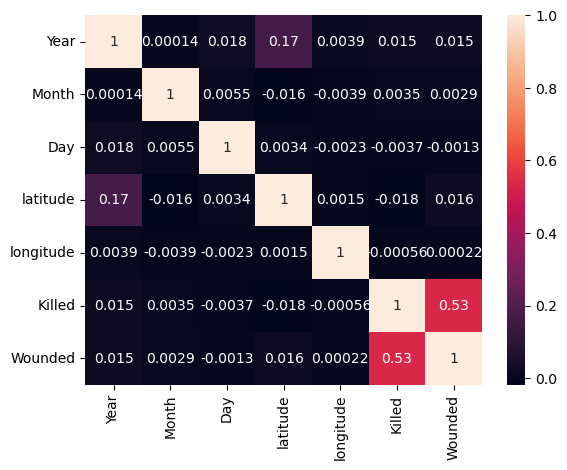

In [16]:
#Visualizing it using heatmap
sns.heatmap(df1.corr(),annot=True)

# Top 10 countries affected by terrorism

In [17]:
#Get the individualcount of each country
country_count=df1['Country'].value_counts()
#Get top 10 country counts using slicing
Top10=country_count[:10]
print(Top10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


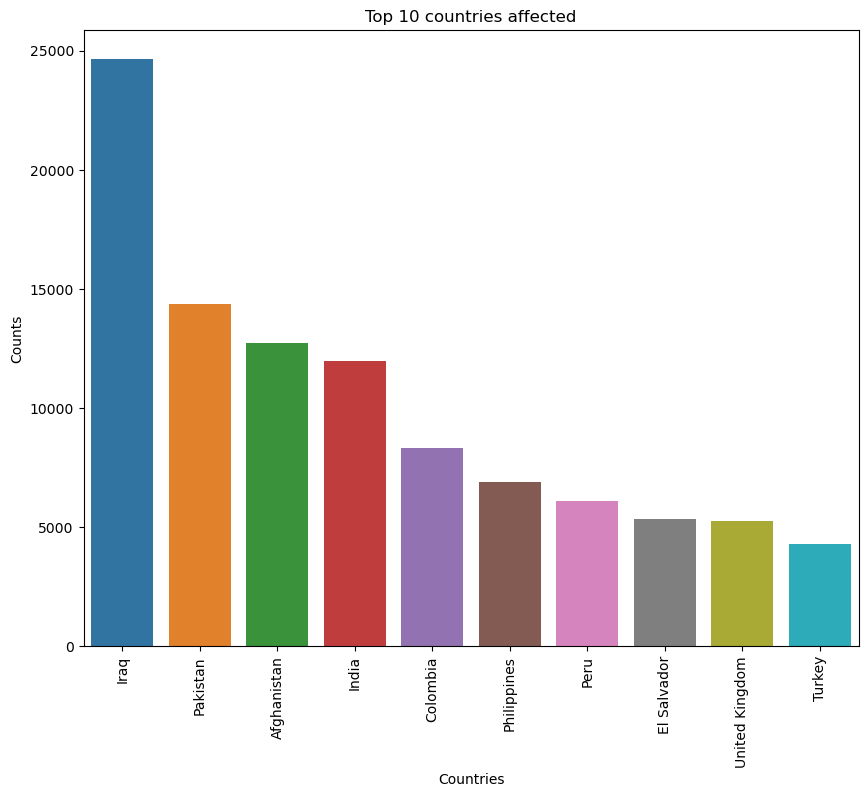

In [18]:
#Now visualizing it using barplot
plt.figure(figsize=(10,8))
sns.barplot(df1['Country'].value_counts()[:10].index,df1['Country'].value_counts()[:10].values)
plt.title('Top 10 countries affected')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=90);

# Terrorist activities according to year

Text(0.5, 1.0, 'Terrorist activities according to the year')

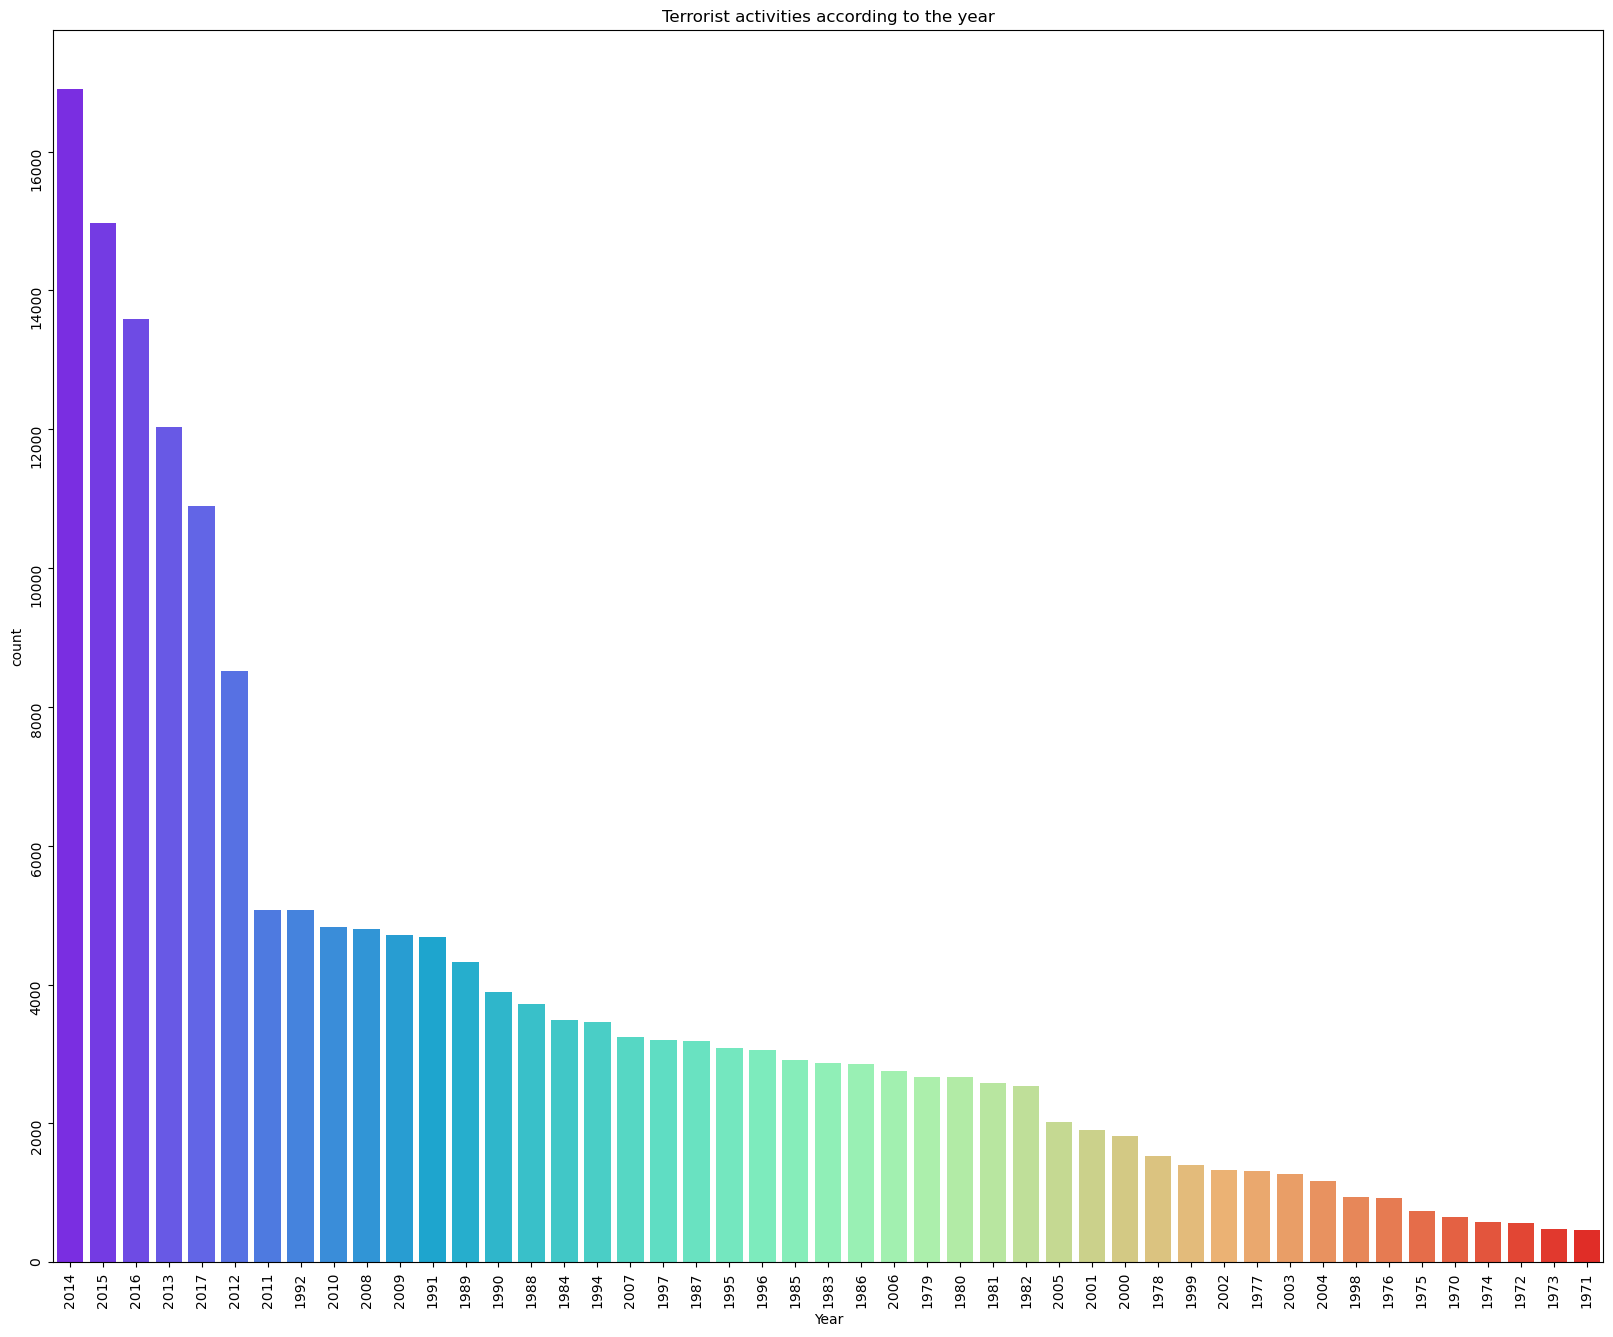

In [19]:
plt.figure(figsize=(20,16))
sns.countplot('Year',data=df1,order=df1['Year'].value_counts().index,palette='rainbow')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.title('Terrorist activities according to the year')

# Mostly Affected States

In [20]:
print('Most affected states are: \n',df1['State'].value_counts().head())

Most affected states are: 
 Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: State, dtype: int64


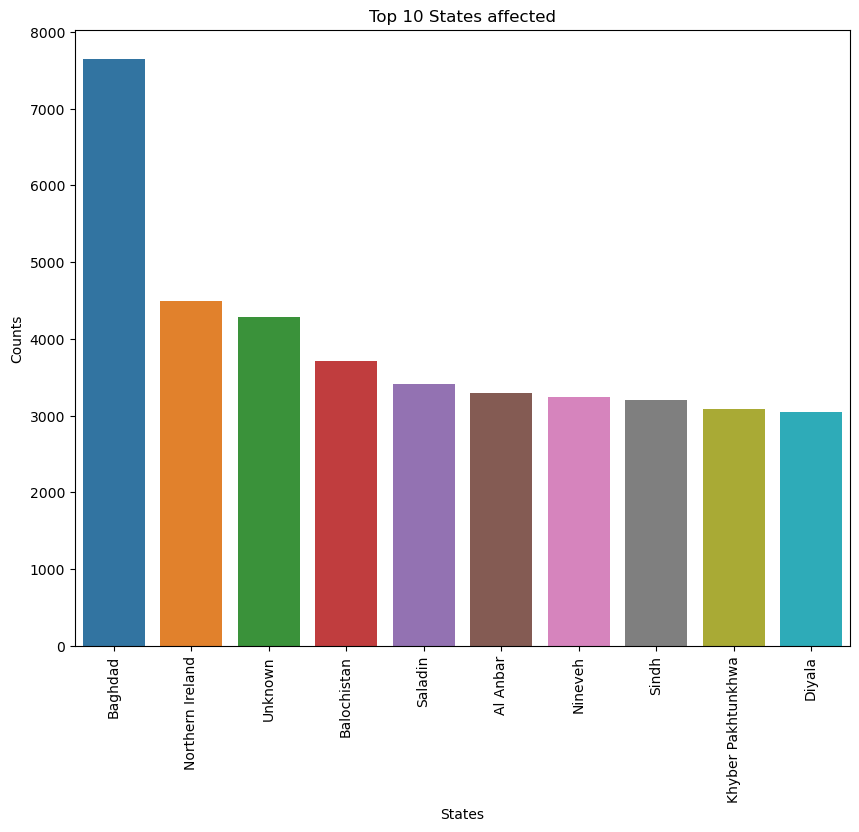

In [22]:
#Now visualizing it using barplot
plt.figure(figsize=(10,8))
sns.barplot(df1['State'].value_counts()[:10].index,df1['State'].value_counts()[:10].values)
plt.title('Top 10 States affected')
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(rotation=90);

# Attack Types By various terrorist groups

Text(0.5, 1.0, 'Most used attack Types')

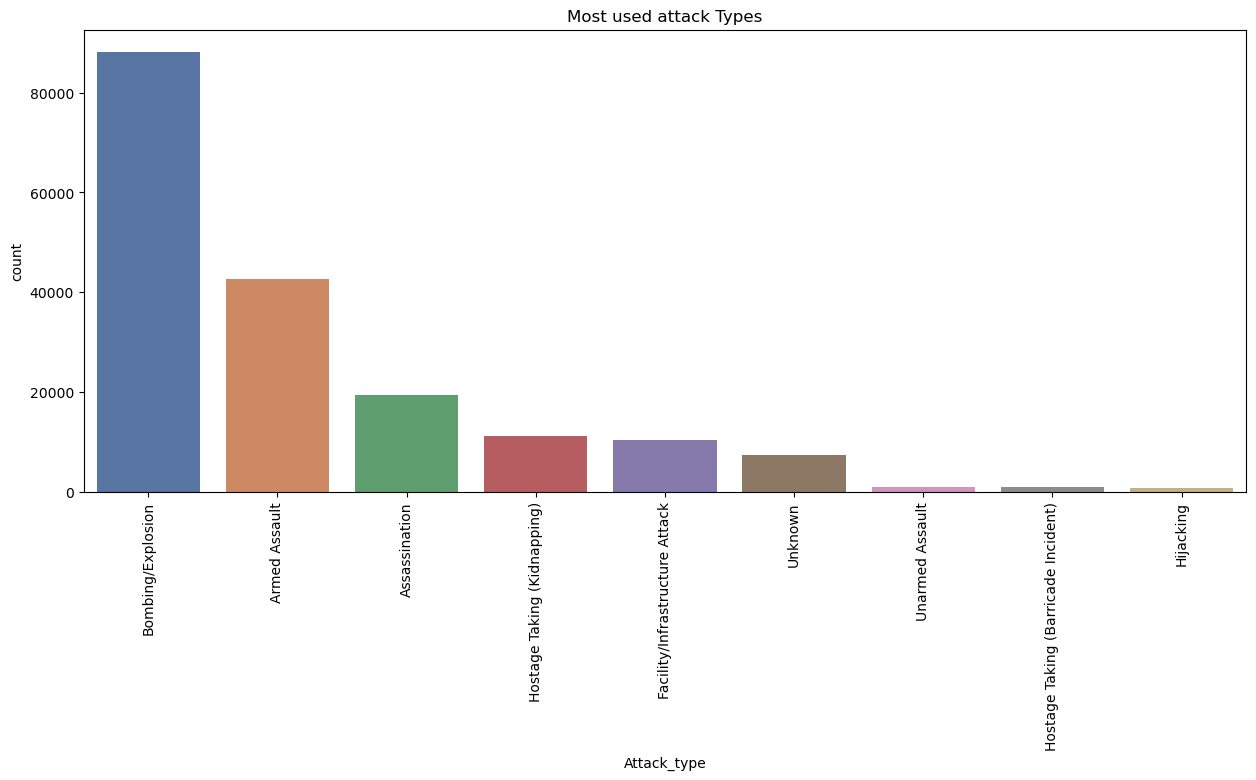

In [27]:
plt.figure(figsize=(15,6))
sns.countplot('Attack_type',data=df1,order=df1['Attack_type'].value_counts().index,palette='deep')
plt.xticks(rotation=90)
plt.title('Most used attack Types')


# Groups with most terrorist attacks

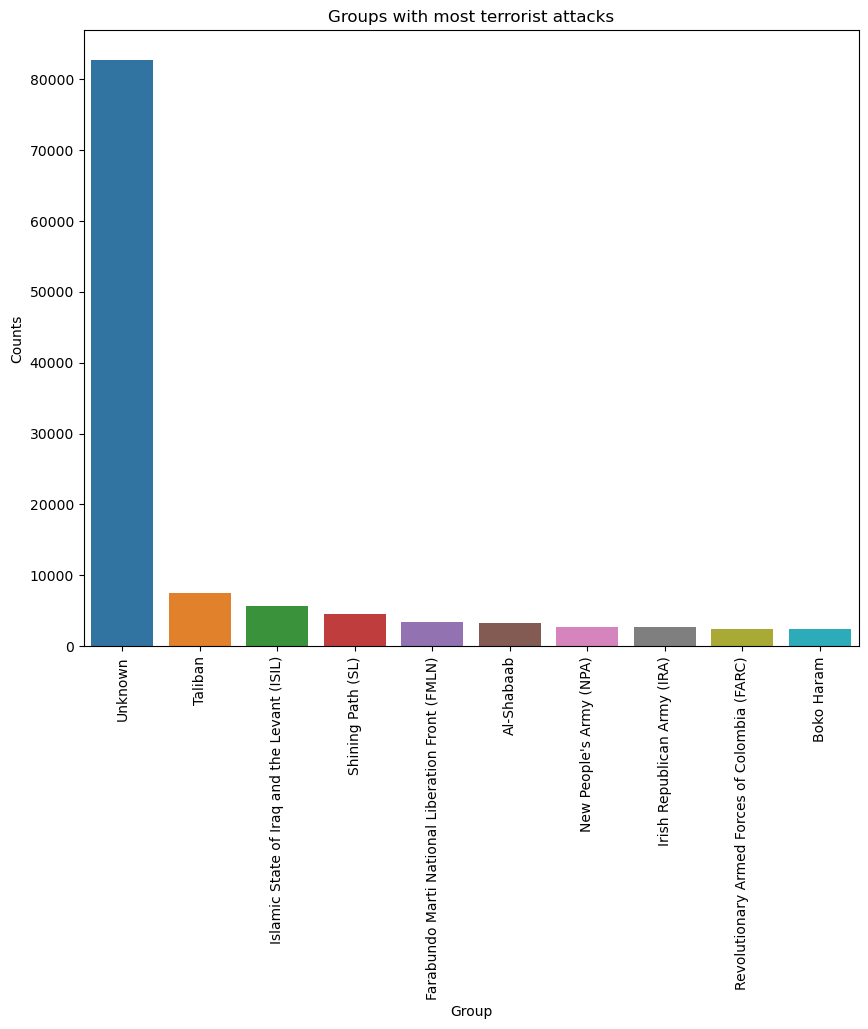

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(df1['Group'].value_counts()[:10].index,df1['Group'].value_counts()[:10].values)
plt.title('Groups with most terrorist attacks')
plt.xlabel('Group')
plt.ylabel('Counts')
plt.xticks(rotation=90);

# Target type of terrorist

Text(0.5, 1.0, 'Most frequent target types of terrorist')

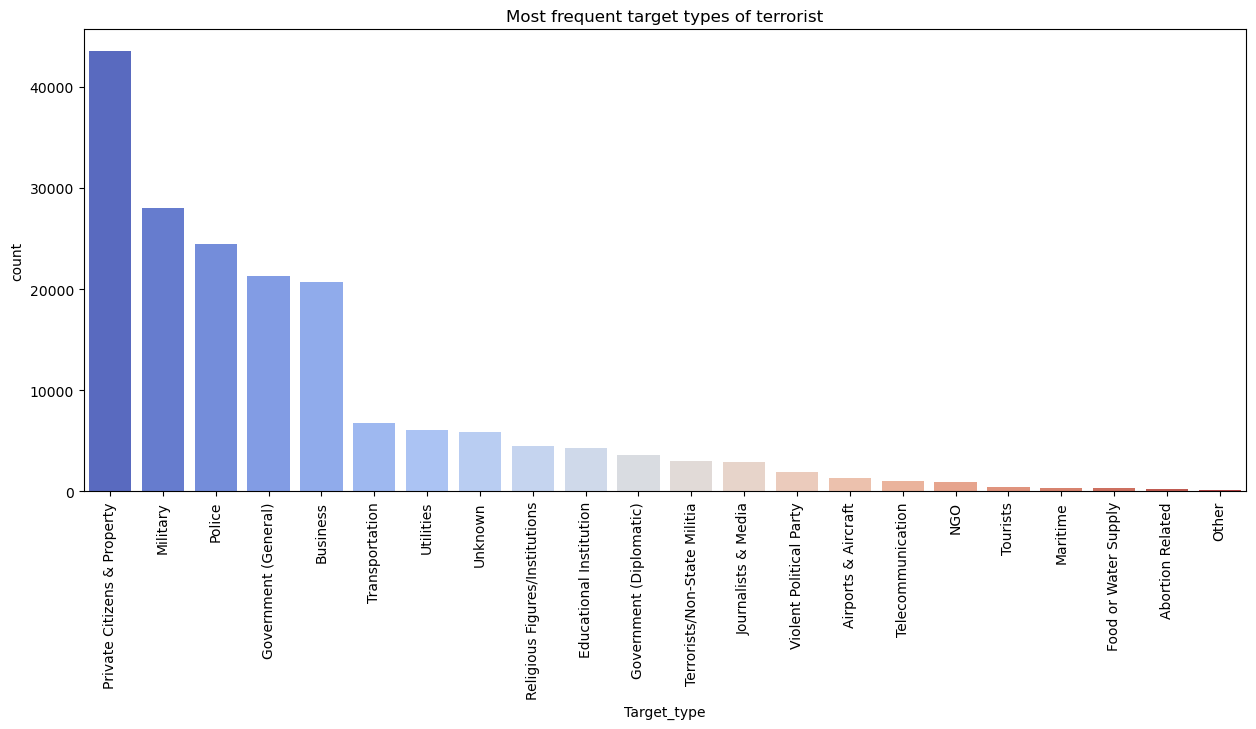

In [29]:
plt.figure(figsize=(15,6))
sns.countplot('Target_type',data=df1,order=df1['Target_type'].value_counts().index,palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Most frequent target types of terrorist')

# Most Affected regions

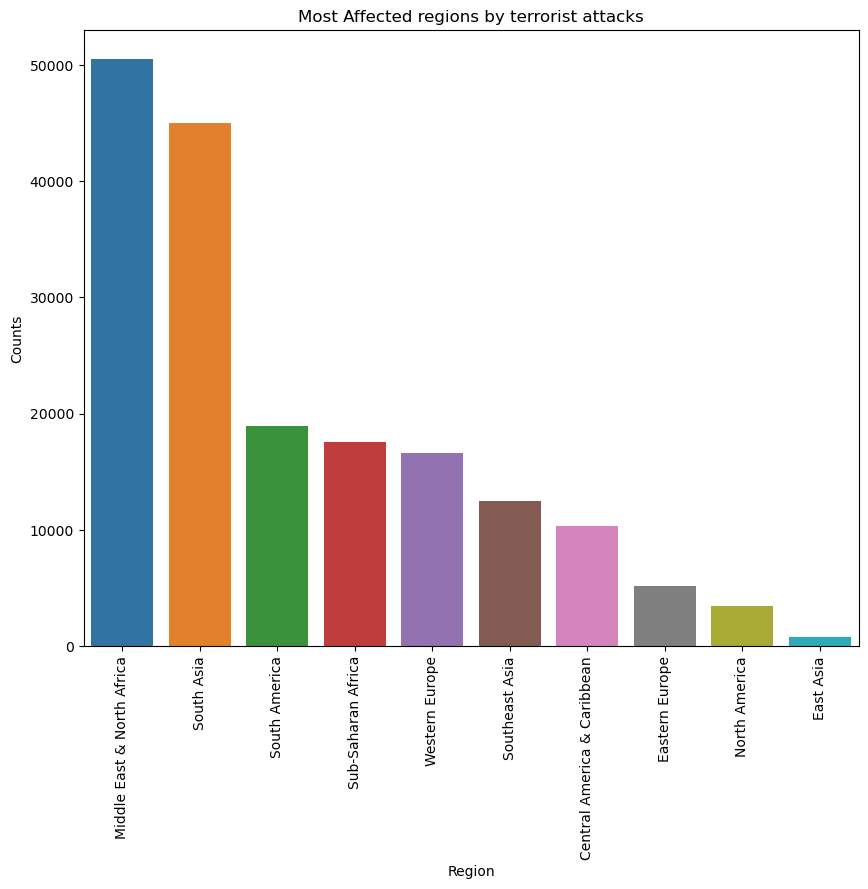

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(df1['Region'].value_counts()[:10].index,df1['Region'].value_counts()[:10].values)
plt.title('Most Affected regions by terrorist attacks')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=90);

# Insights:

1.Iraq is most affected country.

2.The year 2014 has observed the most number of terrorist activities.

3.Baghdad is the most affceted state due to terrorism.

4.Bombing and explosion is the most frequently used attack type by the terrorist.

5.An unknown group is the most active terrorist organisation followed by taliban

6.Citizens and property are the most frequent target types of terrorist

7.Middle east and north africa is the most affected region due t terrorism